<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Fonctions-utilitaires" data-toc-modified-id="Fonctions-utilitaires-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fonctions utilitaires</a></span></li></ul></li><li><span><a href="#Première-approche:-SIFT" data-toc-modified-id="Première-approche:-SIFT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Première approche: SIFT</a></span><ul class="toc-item"><li><span><a href="#Vérifier-l'ordre" data-toc-modified-id="Vérifier-l'ordre-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Vérifier l'ordre</a></span></li><li><span><a href="#Création-du-vocabulaire" data-toc-modified-id="Création-du-vocabulaire-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Création du vocabulaire</a></span></li><li><span><a href="#Préparation-des-vrais-clusters." data-toc-modified-id="Préparation-des-vrais-clusters.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Préparation des vrais clusters.</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li><li><span><a href="#Deuxième-approche:-VGG16" data-toc-modified-id="Deuxième-approche:-VGG16-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deuxième approche: VGG16</a></span><ul class="toc-item"><li><span><a href="#Initialisation-et-création-de-la-représentation" data-toc-modified-id="Initialisation-et-création-de-la-représentation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initialisation et création de la représentation</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li><li><span><a href="#Troisième-approche:-ResNet50" data-toc-modified-id="Troisième-approche:-ResNet50-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Troisième approche: ResNet50</a></span><ul class="toc-item"><li><span><a href="#Initialisation-et-création-de-la-représentation" data-toc-modified-id="Initialisation-et-création-de-la-représentation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Initialisation et création de la représentation</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li></ul></div>

# Notebook étude de faisabilité d'un moteur de classification automatique.

Nous explorerons dans ce notebook la faisabilité d'implémentation d'un moteur de classification automatique basée sur les **images** fournies par les vendeurs.

## Imports

In [1]:
import gensim
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
import tensorflow.keras
import tensorflow as tf
import umap.plot
import sklearn.datasets
import sympy
import scipy.sparse
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from sklearn.cluster import MiniBatchKMeans, KMeans
import logging
import ast
import umap
import cv2
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import make_scorer
import hdbscan
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import transformers
from transformers import *
import time

Nous nous baserons sur le travail déjà effectué fournis. 

### Fonctions utilitaires

In [6]:
def ARI_fct_KMeans(features):
    """
    Détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
    Réduction dimensionelle avec umap.

    Calcul des clusters avec un KMeans et 
    calcul du score ARI entre les vrais catégories et les clusters.
    Réduction dimensionelle avec umap pour projeter les résultats en 2d.

    Parameters:
    features (array): Les features représentant les corpus(Countvectorizer, Tf_idf, Word2Vec, BERT...)

    Returns:
    ARI (float): Le score ARI, arrondi à 10e-4
    X_umap (array(float)): La projection qui est calculée par umap
    cls.labels_ (array(int)): L'array qui contient les labels des clusters

    """
    time1 = time.time()
    num_labels = len(l_cat)
    cls = cluster.KMeans(n_clusters=num_labels, random_state = 0)
    cls.fit(features)
    X_umap = umap.UMAP(n_components=2, metric="cosine").fit_transform(features)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_umap, cls.labels_


def ARI_fct_UMAP_KMeans(features):
    """
    Détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
    Réduction dimensionelle avec umap.

    Réduction dimensionelle avec umap(n_components=4)
    et calcul des clusters avec un KMeans et
    calcul du score ARI entre les vrais catégories et les clusters.
    Réduction dimensionelle avec umap pour projeter les résultats en 2d.

    Parameters:
    features (array): Les features représentant les corpus (Countvectorizer, Tf_idf, Word2Vec, BERT...)

    Returns:
    ARI (float): Le score ARI, arrondi à 10e-4
    X_umap (array(float)): La projection qui est calculée par umap
    cls.labels_ (array(int)): L'array qui contient les labels des clusters

    """
    time1 = time.time()
    num_labels = len(l_cat)
    X_umap = umap.UMAP(n_components=2).fit_transform(features)
    cls = cluster.KMeans(n_clusters=num_labels, random_state = 0)
    cls.fit(X_umap)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_umap, cls.labels_


def ARI_fct_UMAP_Dendro(features):
    """
    Détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
    Réduction dimensionelle avec umap.

    Réduction dimensionelle avec umap(n_components=4)
    et calcul des clusters avec AgglomerativeClustering et
    calcul du score ARI entre les vrais catégories et les clusters.
    Réduction dimensionelle avec umap pour projeter les résultats en 2d.

    Parameters:
    features (array): Les features représentant les corpus (Countvectorizer, Tf_idf, Word2Vec, BERT...)

    Returns:
    ARI (float): Le score ARI, arrondi à 10e-4
    X_umap (array(float)): La projection qui est calculée par umap
    cls.labels_ (array(int)): L'array qui contient les labels des clusters

    """
    time1 = time.time()
    num_labels = len(l_cat)
    X_umap = umap.UMAP(n_components=2).fit_transform(features)
    cls = cluster.AgglomerativeClustering(n_clusters=num_labels)
    cls.fit(X_umap)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_umap, cls.labels_


def ARI_fct_HDBSCAN(features):
    """
    Détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
    Réduction dimensionelle avec umap.

    Calcul des clusters avec un HDBSCAN et
    calcul du score ARI entre les vrais catégories et les clusters.
    Réduction dimensionelle avec umap pour projeter les résultats en 2d.

    Parameters:
    features (array): Les features représentant les corpus (Countvectorizer, Tf_idf, Word2Vec, BERT...)

    Returns:
    ARI (float): Le score ARI, arrondi à 10e-4
    X_umap (array(float)): La projection qui est calculée par umap
    random_search.best_estimator_.labels_ (array(int)): L'array qui contient les labels des clusters

    """
    time1 = time.time()
    num_labels = len(l_cat)
    hdb = hdbscan.HDBSCAN(gen_min_span_tree=True,
                          min_samples=20, min_cluster_size=20)
    hdb.fit(features)
    X_umap = umap.UMAP(n_components=2).fit_transform(features)
    ARI = np.round(metrics.adjusted_rand_score(
        y_cat_num, hdb.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)

    return ARI, X_umap, hdb.labels_


def ARI_fct_UMAP_HDBSCAN(features):
    """
    Détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
    Réduction dimensionelle avec umap.

    Réduction dimensionelle avec umap(n_components=4)
    et calcul des clusters avec HDBSCAN et
    calcul du score ARI entre les vrais catégories et les clusters.
    Réduction dimensionelle avec umap pour projeter les résultats en 2d.

    Parameters:
    features (array): Les features représentant les corpus (Countvectorizer, Tf_idf, Word2Vec, BERT...)

    Returns:
    ARI (float): Le score ARI, arrondi à 10e-4
    X_umap (array(float)): La projection qui est calculée par umap
    random_search.best_estimator_.labels_ (array(int)): L'array qui contient les labels des clusters

    """
    time1 = time.time()
    mapper = umap.UMAP(
        n_components=2).fit(features)
    num_labels = len(l_cat)
    X_umap = mapper.fit_transform(features)
    hdb = hdbscan.HDBSCAN(gen_min_span_tree=True,
                          min_samples=20, min_cluster_size=20)
    hdb.fit(X_umap)
    ARI = np.round(metrics.adjusted_rand_score(
        y_cat_num, hdb.labels_), 4)
    time2 = np.round(time.time() - time1, 0)
    print("ARI : ", ARI, "time : ", time2)
    return ARI, X_umap, hdb.labels_


def umap_visu_fct(X_umap, y_cat_num, labels, ARI):
    """
    Affiche la aisualisation de umap selon les vraies catégories et selon les clusters.

    Scatter plot coloré avec les vrais clusters, et les clusters prédits.

    Parameters:
    X_umap (array): La projection qui est calculée par umap
    y_cat_num (list(int)): Le numéro des catégories
    labels (array): L'array qui contient les labels des clusters
    ARI float: Le score ARI, arrondi à 10e-4 

    Returns: 
    None
    """
    fig = plt.figure(figsize=(15, 6))

    ax = fig.add_subplot(121)

    scatter = sns.scatterplot(
        data=X_umap, x=X_umap[:, 0], y=X_umap[:, 1], hue=y_cat_num, palette='Paired')
    plt.title('Représentation des items par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = sns.scatterplot(
        data=X_umap, x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='Paired')
    plt.title('Représentation items par clusters')

    plt.show()

## Première approche: SIFT

Vérification que nos images sont dans le même ordre que les rangées du tableau.

### Vérifier l'ordre

In [3]:
checking_order = []
image_location = '/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJET 6/Flipkart/Images'
for dirname, _, filenames in os.walk(image_location):
    for filename in filenames:
        checking_order.append(filename)

checking_order = pd.Series(checking_order).sort_values(ignore_index=True)

### Création du vocabulaire

Ici nous créons le "vocabulaire", c'est-à-dire, tous les decriptors SIFT des images du "corpus"

In [4]:
# VOCABULARY

liste_dropped_images = []
liste_features = []

down_width = 512
down_height = 512
down_points = (down_width, down_height)

for dirname, _, filenames in os.walk(image_location):
    for filename in checking_order.values:
        img = cv2.imread(os.path.join(dirname, filename))  # Lecture de l'image
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Passage au gris

        img = cv2.resize(img, down_points,
                         interpolation=cv2.INTER_CUBIC)  # Resize
        img = cv2.fastNlMeansDenoising(img)  # Denoising
        
        img = cv2.equalizeHist(img)  # Égalisation de l'histogramme
        
        sift = cv2.SIFT_create()  # Appel du modèle
        
        kp, des = sift.detectAndCompute(img, None)  # Calcul des descriptors
        
        if (des is not None):
            liste_features.append(des)  # Enregistrement des features
        else:
            liste_dropped_images.append(os.path.join(dirname, filename))

À partir de ces descriptors nous pouvons effectuer la créatin des features, les centroïdes par KMeans des clusters de descriptors. 
C'est features seront utilisées pour encoder ce corpus d'image.

In [5]:
def BOVW(feature_descriptors, n_clusters = 100):
    """
    Création de l'histogramme.
    
    Création de l'histogramme de fréquence d'apparition des 
    centroïdes (features) des descriptors dans les images traitées.
    
    Parameters:
    feature_descriptors (list): Liste des descriptors
    n_clusters (int): Nombre des clusters pour l'algorithme KMeans, correspond aussi au nombre de features
    
    Returns:
    bovw_vector (array): L'histogramme des mots visuels
    
    """
    print("Bag des mots visuels {} clusters".format(n_clusters))
    combined_features = np.vstack(np.array(feature_descriptors))
    print("Entrainement K-means")
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0).fit(combined_features)
    print("Entrainement fini K-means")
    bovw_vector = np.zeros([len(feature_descriptors), n_clusters])
                                                                  # Le nombre d'image par le nombre de cluster (features) 
                                                                  # number of images x number of clusters.
    for index, features in enumerate(feature_descriptors):# Les descriptors sift de chaque image
        try:
            for label in kmeans.predict(features): # déterminer l'appartenance de tous les descriptors d'une image
                bovw_vector[index, label] += 1 # créer l'histogramme
        except:
            pass
    return bovw_vector 

bovw_vector = BOVW(liste_features, n_clusters = 1050) # Ce nombre est à déterminer en fonction du jeu de données




Bag des mots visuels 1050 clusters


/var/folders/98/5l4cm7ds2qjgs6glp4j251x40000gn/T/ipykernel_2185/2078066963.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  combined_features = np.vstack(np.array(feature_descriptors))


Entrainement K-means
Entrainement fini K-means


### Préparation des vrais clusters.

Traitement identique au notebook NLP

In [7]:
data_T0 = pd.read_csv("/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJET 6/Flipkart/flipkart_com-ecommerce_sample_1050.csv").sort_values(by=["image"], ignore_index=True)
print(data_T0.shape)

(1050, 15)


In [8]:
category_levels = (data_T0["product_category_tree"]
     .apply(lambda x: ast.literal_eval(x))
     .apply(lambda x: x[0].replace("\\","").replace("'","").split(" >> "))
     .apply(pd.Series)
     .rename(columns= lambda x: "level_"+str(x)))

In [9]:
df = pd.concat([category_levels, data_T0], axis=1)
data_T0 = df.drop(columns = ["level_1", "level_2", "level_3","level_4", "level_5", "level_6"])

In [10]:
l_cat = list(set(data_T0["level_0"]))
print("catégories : ", l_cat)
y_cat_num = [(l_cat.index(data_T0.iloc[i]['level_0'])) for i in range(len(data_T0))]

catégories :  ['Beauty and Personal Care', 'Baby Care', 'Home Decor & Festive Needs', 'Computers', 'Kitchen & Dining', 'Watches', 'Home Furnishing']


### Clustering

SIFT, KMeans: 
-----------------
ARI :  0.0141 time :  6.0


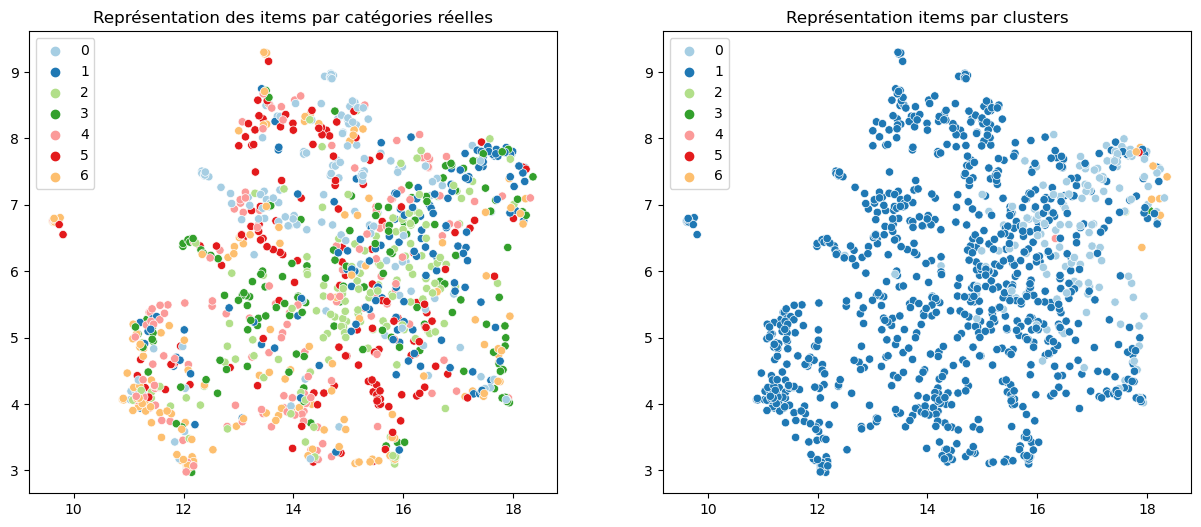

SIFT, UMAP_KMeans: 
-----------------
ARI :  0.072 time :  2.0


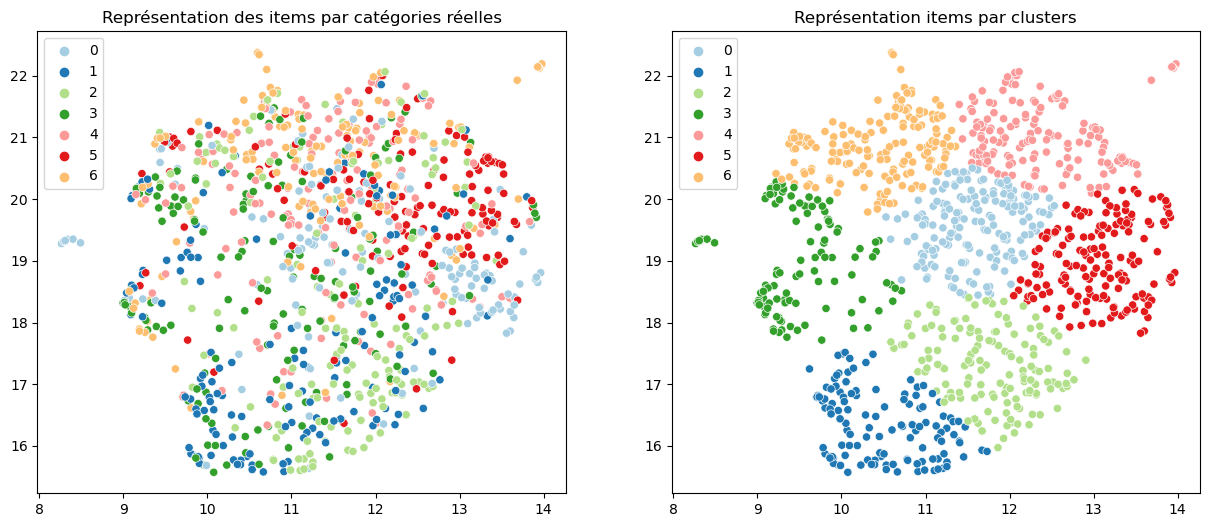

SIFT, Dendro: 
-----------------
ARI :  0.0855 time :  2.0


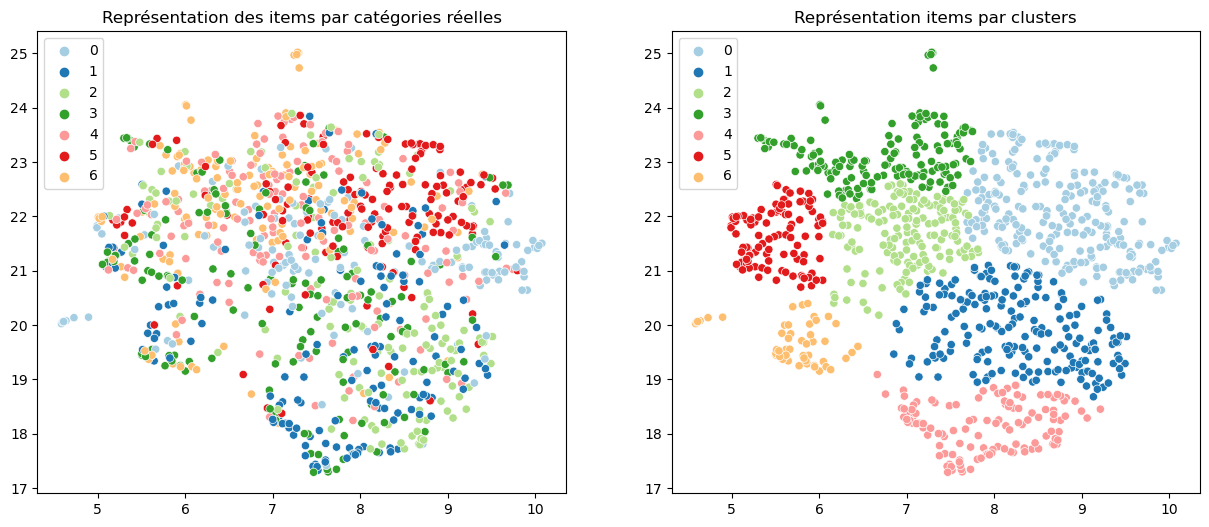

SIFT, HDBSCAN: 
-----------------
ARI :  0.0 time :  4.0


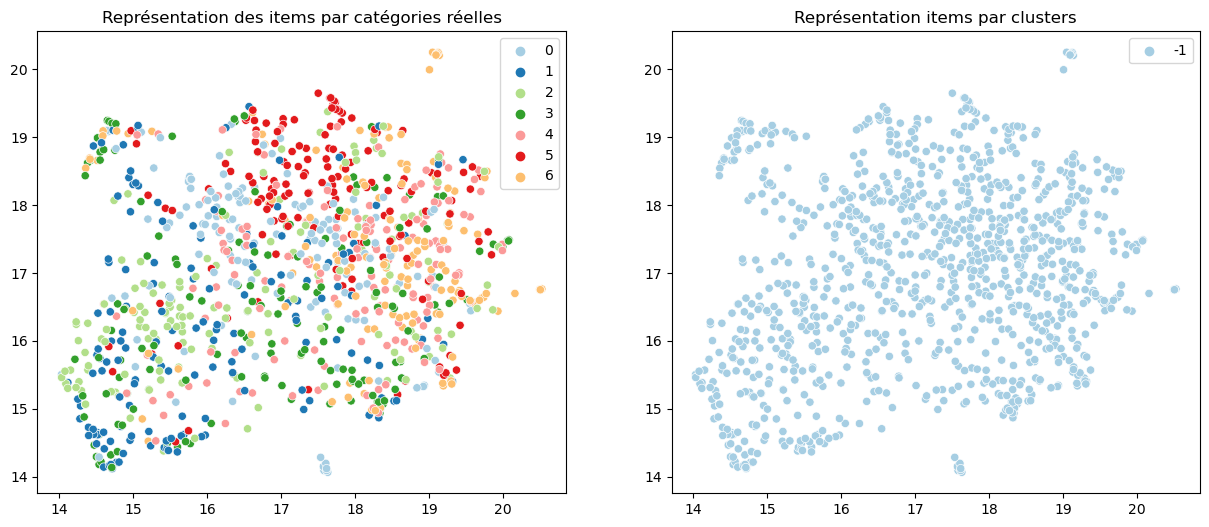

SIFT, UMAP HDBSCAN: 
-----------------
ARI :  0.0013 time :  4.0


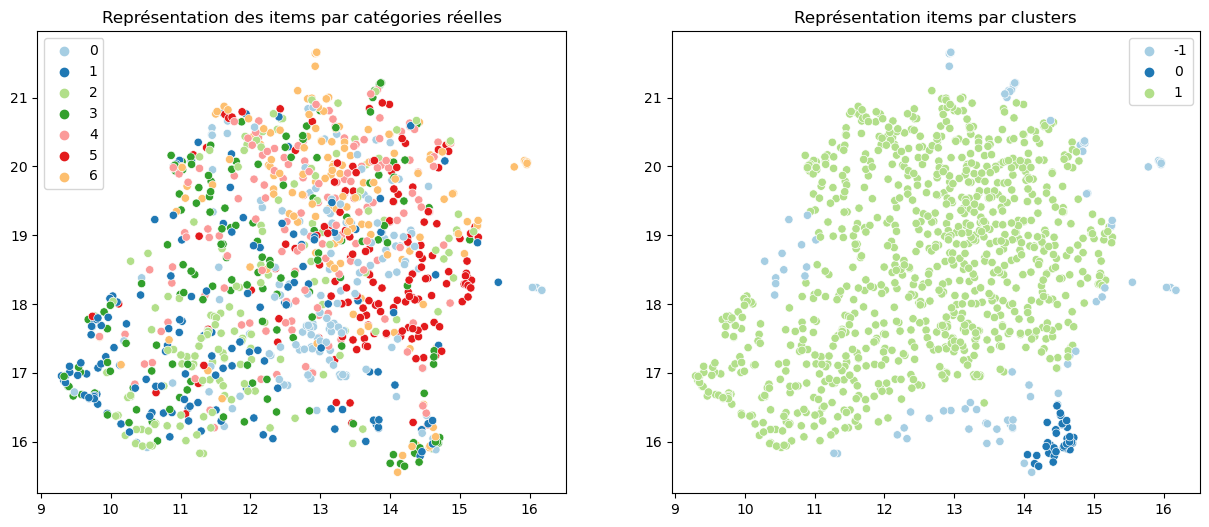

In [10]:
print("SIFT, KMeans: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_KMeans(bovw_vector)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("SIFT, UMAP_KMeans: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_KMeans(bovw_vector)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("SIFT, Dendro: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_Dendro(bovw_vector)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("SIFT, HDBSCAN: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_HDBSCAN(bovw_vector)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("SIFT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_HDBSCAN(bovw_vector)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

Les résultats sont complètement équivalents à une distribution aléatoire. Aucune tendance n'a été détectée avec cette méthode.

## Deuxième approche: VGG16

VGG16 est un modèle pré-entrainé, et permet de manière indirecte, accès au ressources de calcul d'énormes serveurs. Voyons les résultats de ce modèle.

### Initialisation et création de la représentation

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
vgg16_feature_list = []
model = VGG16(weights='imagenet', include_top=False)
for dirname, _, filenames in os.walk(image_location):
    for filename in checking_order.values:
       
        img_path = os.path.join(dirname, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        vgg16_feature = model.predict(x)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())
vgg16_feature_list_np = np.array(vgg16_feature_list)

vgg16_feature_list_np.shape

2022-11-15 12:18:33.416146: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 228ms/step


1/1 [==============================] - 0s 284ms/step


/Users/loicvalenti/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 226ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 240ms/step


1/1 [==============================] - 0s 251ms/step


(1050, 25088)

### Clustering

VGG16, KMeans: 
-----------------
ARI :  0.2073 time :  23.0


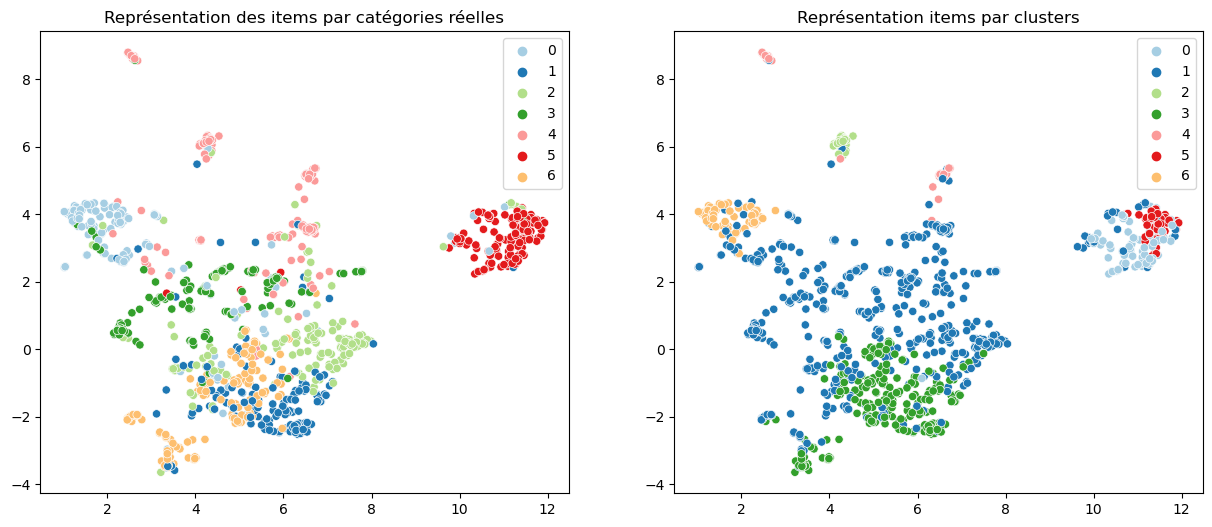

VGG16, UMAP_KMeans: 
-----------------
ARI :  0.2248 time :  6.0


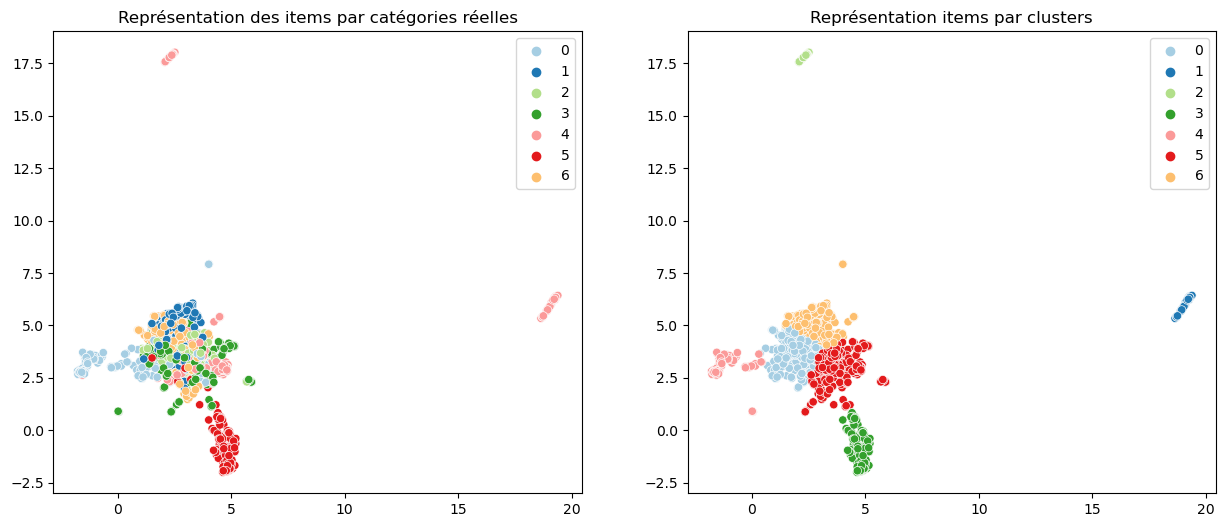

VGG16, Dendro: 
-----------------
ARI :  0.2705 time :  6.0


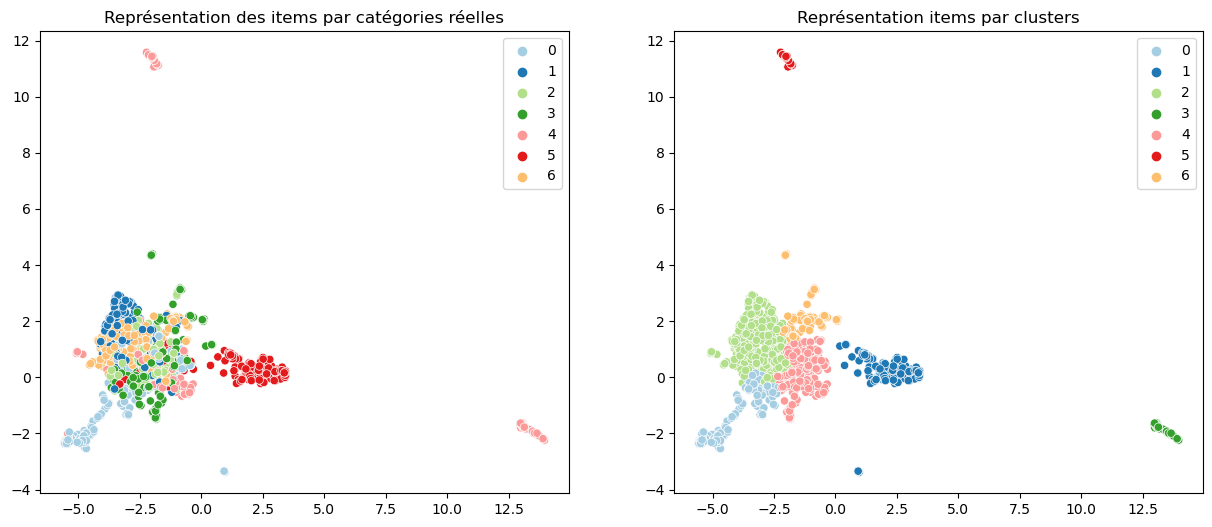

VGG16, HDBSCAN: 
-----------------
ARI :  0.0 time :  47.0


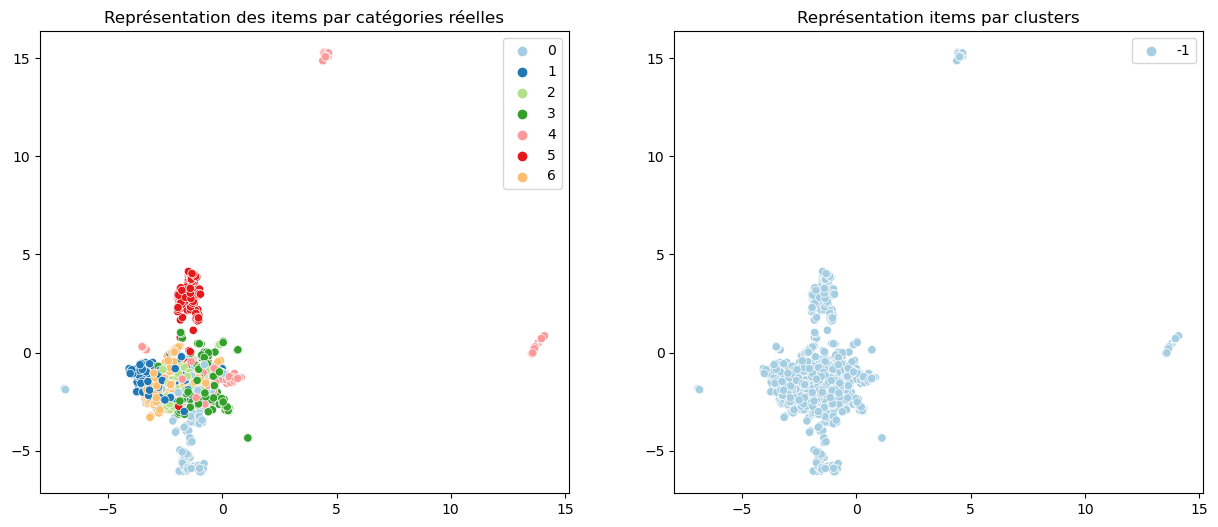

VGG16, UMAP HDBSCAN: 
-----------------
ARI :  0.1277 time :  12.0


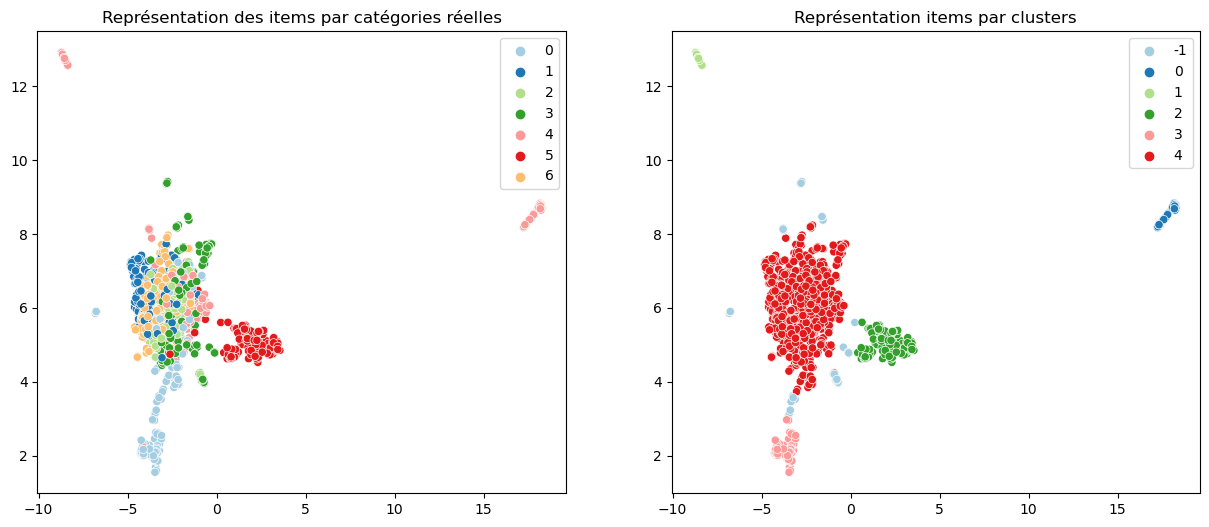

In [11]:
print("VGG16, KMeans: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_KMeans(vgg16_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("VGG16, UMAP_KMeans: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_KMeans(vgg16_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("VGG16, Dendro: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_Dendro(vgg16_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("VGG16, HDBSCAN: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_HDBSCAN(vgg16_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("VGG16, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_HDBSCAN(vgg16_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

Les performances sont nettement supérieures, mais pas suffisantes.

## Troisième approche: ResNet50

### Initialisation et création de la représentation

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
resnet50_feature_list = []
model = ResNet50(weights='imagenet', include_top=False)
for dirname, _, filenames in os.walk(image_location):
    for filename in checking_order.values:
        img_path = os.path.join(dirname, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        resnet50_feature = model.predict(x)
        resnet50_feature_np = np.array(resnet50_feature)
        resnet50_feature_list.append(resnet50_feature_np.flatten())
resnet50_feature_list_np = np.array(resnet50_feature_list)

resnet50_feature_list_np.shape

1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 89ms/step


/Users/loicvalenti/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 93ms/step


(1050, 100352)

### Clustering

ResNet50, KMeans: 
-----------------
ARI :  0.3048 time :  79.0


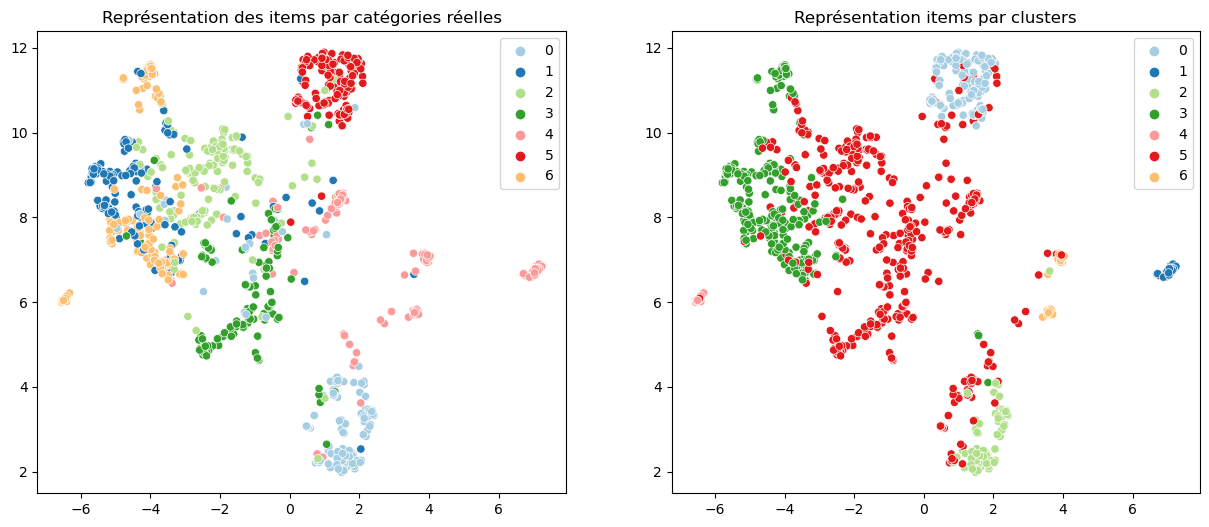

ResNet50, UMAP_KMeans: 
-----------------
ARI :  0.4148 time :  19.0


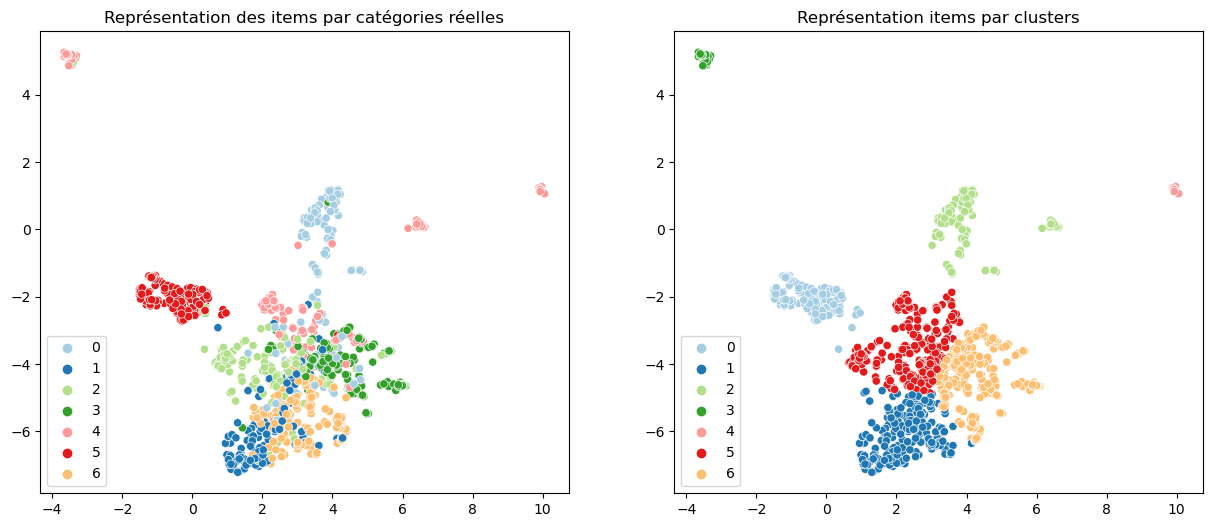

ResNet50, Dendro: 
-----------------
ARI :  0.4295 time :  18.0


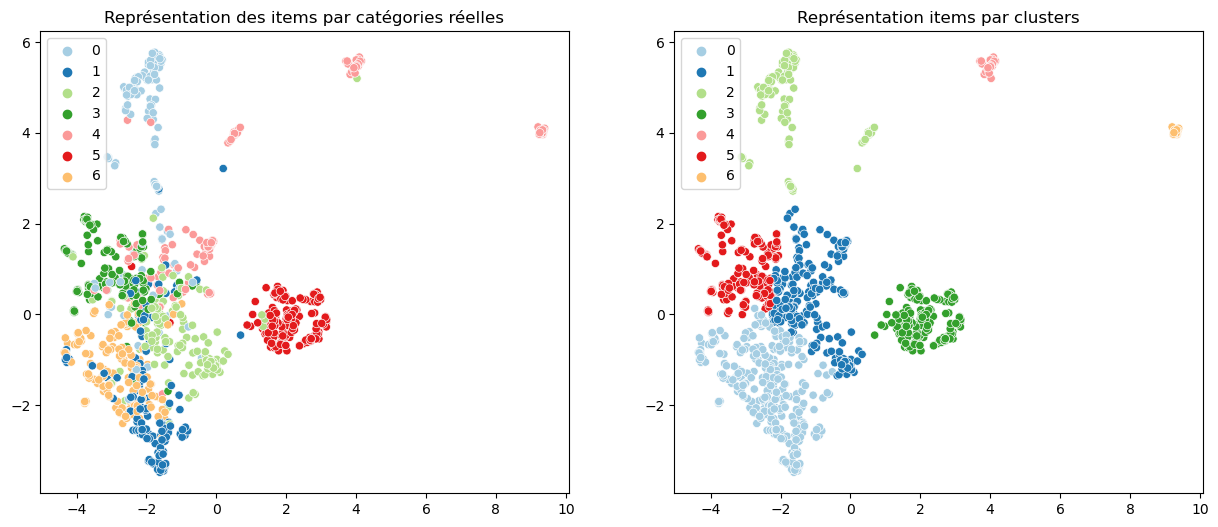

ResNet50, HDBSCAN: 
-----------------
ARI :  0.0053 time :  197.0


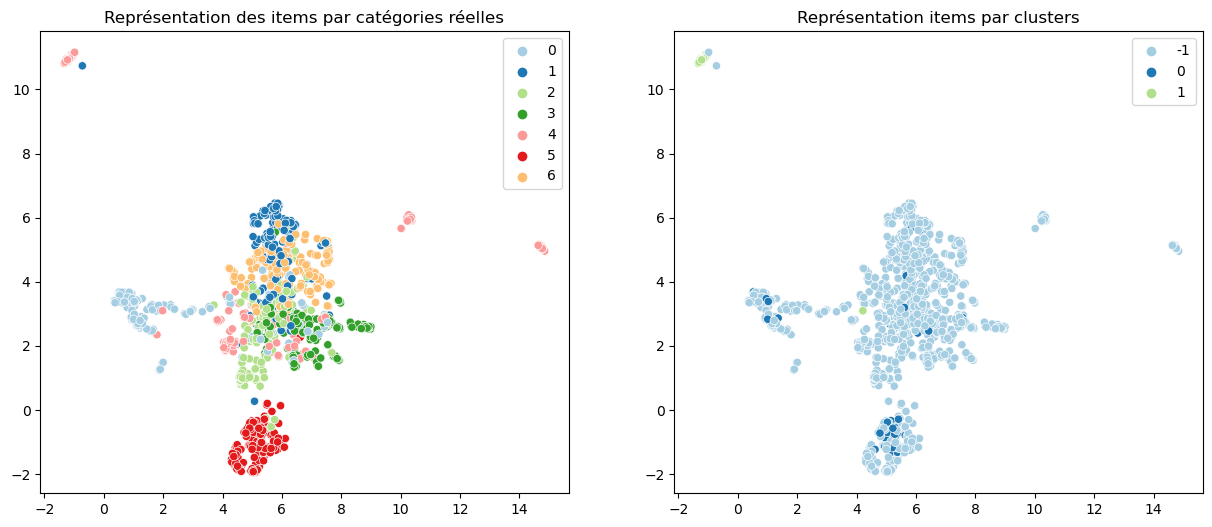

ResNet50, UMAP HDBSCAN: 
-----------------
ARI :  0.0649 time :  39.0


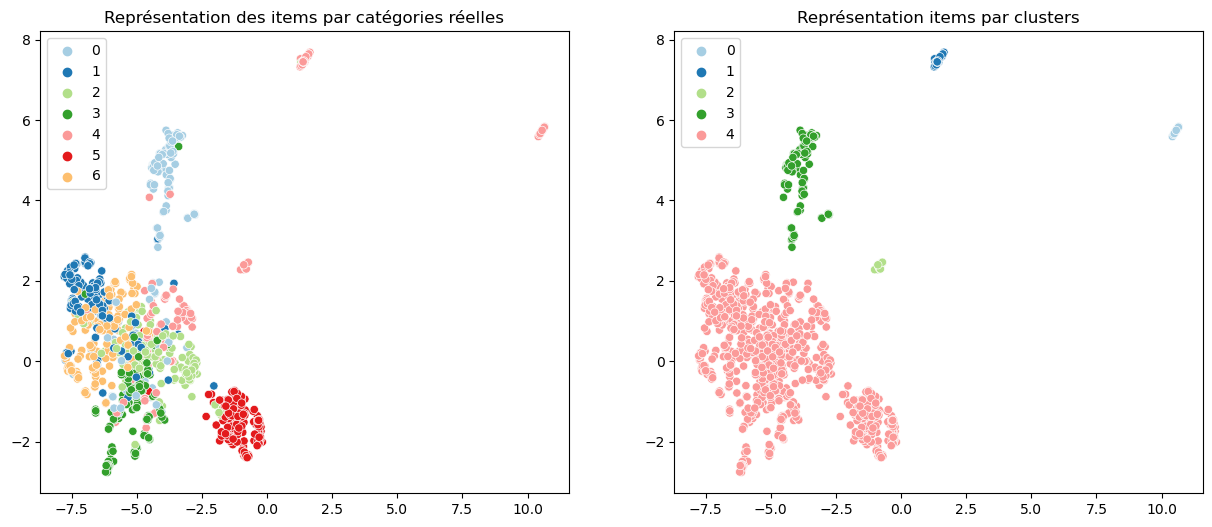

In [13]:
print("ResNet50, KMeans: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_KMeans(resnet50_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("ResNet50, UMAP_KMeans: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_KMeans(resnet50_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("ResNet50, Dendro: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_Dendro(resnet50_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("ResNet50, HDBSCAN: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_HDBSCAN(resnet50_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

print("ResNet50, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_umap, labels = ARI_fct_UMAP_HDBSCAN(resnet50_feature_list_np)
umap_visu_fct(X_umap, y_cat_num, labels, ARI)

Les résultats sont bien meilleurs, mais **toujours inférieurs aux résultats de la partie NLP**. Malgré cela, il se pourrait qu'avec plus de données, la catégorie image s'améliore. En tout cas, tel quel, **il faut se concentrer sur la partie NLP**.